In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('student.csv')

In [3]:
data.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,SD0001,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,NaN,3,4,1,1,3,NaN,1
1,SD0002,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,NaN,3,3,1,1,3,NaN,1
2,SD0003,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,NaN,3,2,2,3,3,10.0,2
3,SD0004,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3.0,2,2,1,1,5,2.0,3
4,SD0005,GP,F,16,U,GT3,T,3,3,other,...,no,no,4.0,3,2,1,2,5,4.0,2


In [4]:
data.shape # 395 rows and 32 columns

(395, 32)

## Missing Values

In [5]:
data.isnull()[:5]

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

ID              0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities     84
nursery         0
higher          0
internet        0
romantic        0
famrel        117
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences       58
Grade           0
dtype: int64

## Deletion

In [7]:
result = data.dropna(how = 'any') # any row that has a missing value drop it

In [8]:
result.isnull().sum()

ID            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64

In [9]:
print ('Before:', data.shape, 'After:', result.shape)

Before: (395, 32) After: (182, 32)


In [10]:
395 - 182

213

## Imputation of Continous Values

In [11]:
data.absences.head()

0     NaN
1     NaN
2    10.0
3     2.0
4     4.0
Name: absences, dtype: float64

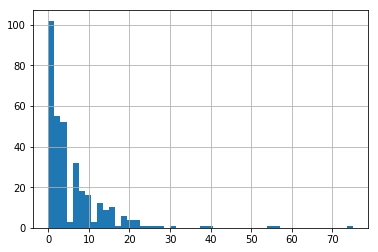

In [12]:
data.absences.hist(bins = 50) # intervals for histogram are the bins

#### Since, the data is shewed, we will use the median to impute the missing values

In [13]:
data.absences.mean()

5.8664688427299705

In [14]:
data.absences.median()

4.0

In [15]:
data.absences = data.absences.fillna(data.absences.median())

In [16]:
data.absences.head()

0     4.0
1     4.0
2    10.0
3     2.0
4     4.0
Name: absences, dtype: float64

In [17]:
data.absences.isnull().sum()

0

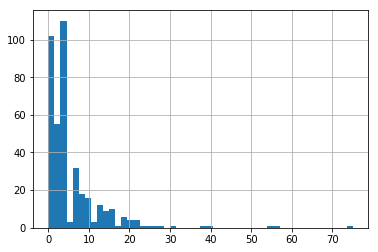

In [18]:
data.absences.hist(bins = 50)

## Imputation for Categorical Variables

In [19]:
data.activities.head(10)

0     no
1     no
2     no
3    yes
4    NaN
5    yes
6     no
7    NaN
8     no
9    NaN
Name: activities, dtype: object

In [20]:
data.activities.mode()[0]

'yes'

In [21]:
data.activities = data.activities.fillna(data.activities.mode()[0])

In [22]:
data.activities.head(10)

0     no
1     no
2     no
3    yes
4    yes
5    yes
6     no
7    yes
8     no
9    yes
Name: activities, dtype: object

### Q. famrel - impute the missing values

# Outlier Detection

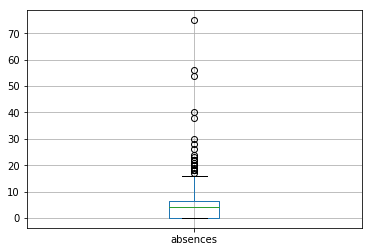

In [23]:
data.boxplot(column = 'absences')

In [24]:
Q1 = data['absences'].quantile(0.25)
Q3 = data['absences'].quantile(0.75)

IQR = Q3 - Q1

print (Q3)
print (Q1)
print (IQR)

6.5
0.0
6.5


In [25]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print (lower_limit)
print (upper_limit)

-9.75
16.25


## Deleting Outliers

In [26]:
print (data.absences[data.absences <= lower_limit].shape)
print (data.absences[data.absences >= upper_limit].shape)

(0,)
(25,)


#### if we delete or drop the rows with outliers, we will end up losing 25 rows of information

## Imputation of the Outlier

In [27]:
data.absences.median()

4.0

In [28]:
median_value = data.absences.median()

def imputer(value):
    if value < lower_limit or value > upper_limit:
        return median_value
    else:
        return value
    
data.absences = data.absences.apply(imputer)

In [29]:
data.absences.mean()

4.10632911392405

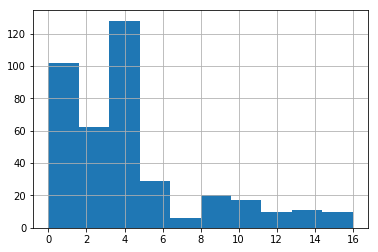

In [30]:
data.absences.hist(bins = 10)

### Q. Create a histogram with log of absences values